# Melanoma Detection Using Convolution Neural Network

# 1. Introduction

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Problem Statement
            </span>   
        </font>    
</h3>

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Motivation:** To create a multiclass classification model using a custom convolutional neural network.

**Data Summary:**

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

# 2. Setting Up Jupyter Notebook

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Supress Warnings
            </span>   
        </font>    
</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Imports Dependencies
            </span>   
        </font>    
</h3>

In [73]:
# !pip install tensorflow==2.13.1

In [48]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import (Dense,
                          InputLayer,
                          Activation,
                          MaxPooling2D,
                          Dropout,
                          Flatten,
                          Conv2D,
                          MaxPool2D,
                          BatchNormalization,
                          AveragePooling2D,
                          GlobalAveragePooling2D)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import load_img

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Modifying Jupyter Views
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# 3. Reading & Understanding the data

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Mounting the google drive
            </span>   
        </font>    
</h3>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Unzip the data
            </span>   
        </font>    
</h3>

In [3]:
!unzip "/content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/CNN_assignment.zip"

Archive:  /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/CNN_assignment.zip
replace Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of images in Train dir: {image_count_train}")
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Number of images in Test dir: {image_count_test}")

Number of images in Train dir: 2239
Number of images in Test dir: 118


In [7]:
class_names = os.listdir(data_dir_train)

class_counts = {}

# Iterate through each class directory and count the images
for class_name in class_names:
    class_path = os.path.join(data_dir_train, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

for class_name, num_images in class_counts.items():
    print(f'Class: {class_name}, Number of images: {num_images}')

Class: actinic keratosis, Number of images: 114
Class: basal cell carcinoma, Number of images: 376
Class: dermatofibroma, Number of images: 95
Class: melanoma, Number of images: 438
Class: nevus, Number of images: 357
Class: pigmented benign keratosis, Number of images: 462
Class: seborrheic keratosis, Number of images: 77
Class: squamous cell carcinoma, Number of images: 181
Class: vascular lesion, Number of images: 139


### Load using keras.preprocessing

- Let's load these images off disk using the helpful image_dataset_from_directory utility.

# 4. Dataset Creation

- Create train and validation datasets with a batch size of 32.
- Resize images to 180x180 pixels.

- Define some parameters for the loader

In [8]:
batch_size = 32
img_height = 180
img_width = 180

- Use 80% of the images for training, and 20% for validation.

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    label_mode = 'categorical',
    subset = 'training',
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  label_mode='categorical',
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# 4. Dataset visualization

## Todo: Create a code to visualize one instance of all the nine classes present in the dataset

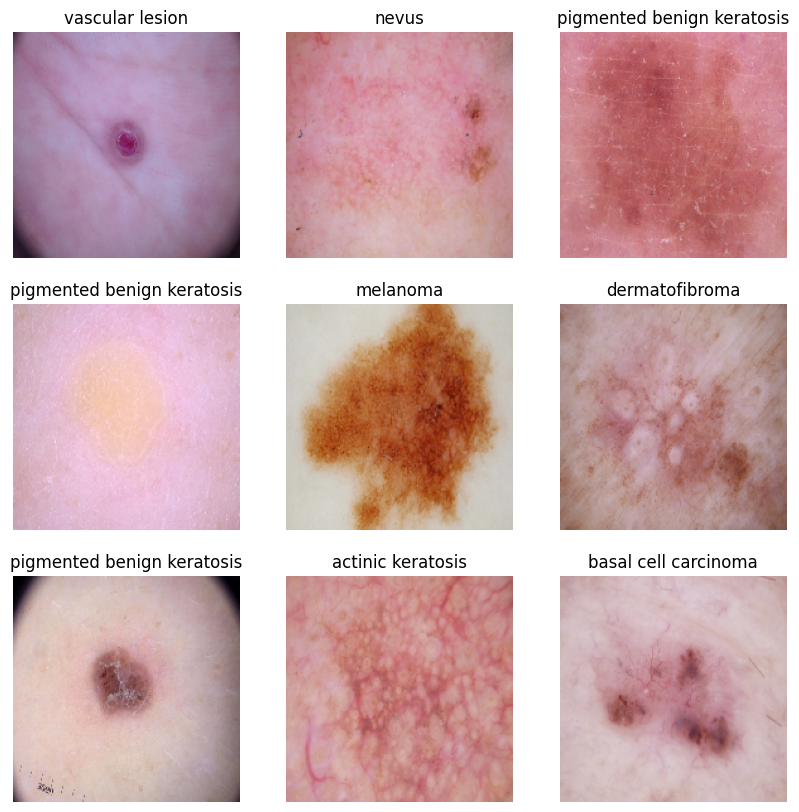

In [17]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names

# Function to visualize images
def visualize_dataset(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(len(class_names)):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[tf.argmax(labels[i])])
            plt.axis("off")

visualize_dataset(train_ds, class_names)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.



- Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

- Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 5. Model Building & Initial Training

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Create the model
            </span>   
        </font>    
</h3>

**Todo:** Create a CNN model, which can accurately detect 9 classes present in the dataset. Use *layers.experimental.preprocessing.Rescaling* to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [13]:
input_shape = (180,180,3)

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 178, 178, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 87, 87, 128)       5

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Vizualizing the model
            </span>   
        </font>    
</h3>

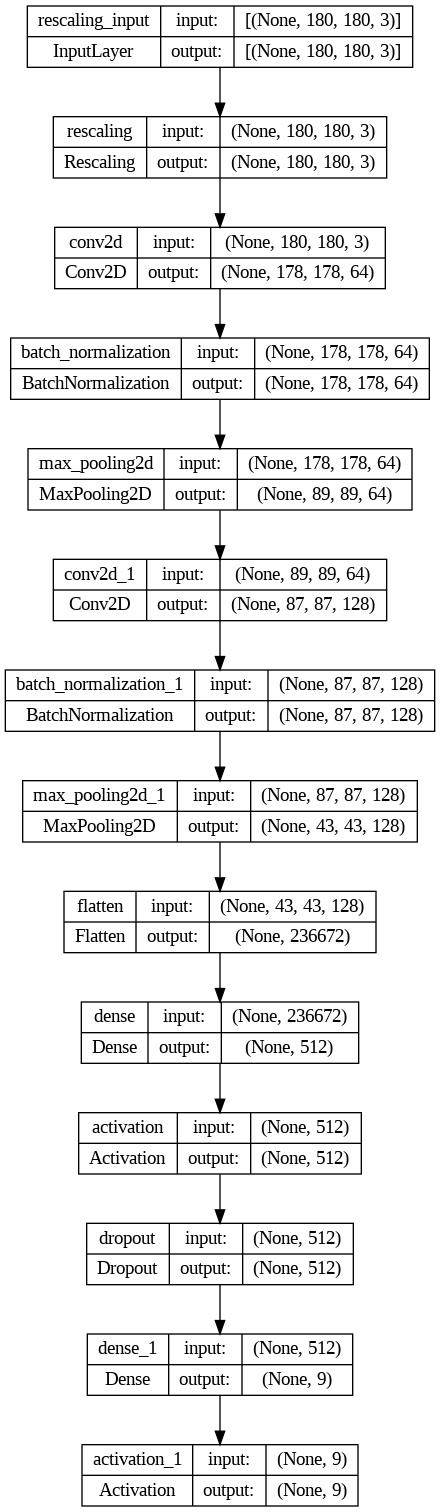

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Compile the model
            </span>   
        </font>    
</h3>

Choose an appropirate optimiser and loss function for model training

In [16]:
# Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
# so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("/content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/checkpoint/model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="auto",verbose=1)

# Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=5,
                          mode="auto",
                          verbose=1)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Train the model
            </span>   
        </font>    
</h3>

In [17]:
epochs = 20
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=[checkpoint, earlystop])

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 140.8194 - accuracy: 0.3075
Epoch 1: val_accuracy improved from -inf to 0.19911, saving model to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/checkpoint/model.h5
56/56 [==============================] - 707s 10s/step - loss: 140.8194 - accuracy: 0.3075 - val_loss: 39.7372 - val_accuracy: 0.1991
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 65.9491 - accuracy: 0.3968
Epoch 2: val_accuracy did not improve from 0.19911
56/56 [==============================] - 489s 9s/step - loss: 65.9491 - accuracy: 0.3968 - val_loss: 58.3045 - val_accuracy: 0.1521
Epoch 3/20
56/56 [==============================] - ETA: 0s - loss: 27.4968 - accuracy: 0.4169
Epoch 3: val_accuracy did not improve from 0.19911
56/56 [==============================] - 491s 9s/step - loss: 27.4968 - accuracy: 0.4169 - val_loss: 41.8471 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - ETA: 0s - lo

# 6. Analyze Findings

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Visualizing training results
            </span>   
        </font>    
</h3>

In [46]:
def plot_training_curves(history, earlystop):

    # Get the range of epochs
    if earlystop.stopped_epoch == 0:
      epochs_range = range(epochs)
    else:
      epochs_range = range(earlystop.stopped_epoch + 1)

    plt.figure(figsize=(15, 10))

    # Plot Model Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot Model Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['loss'], label='Train Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

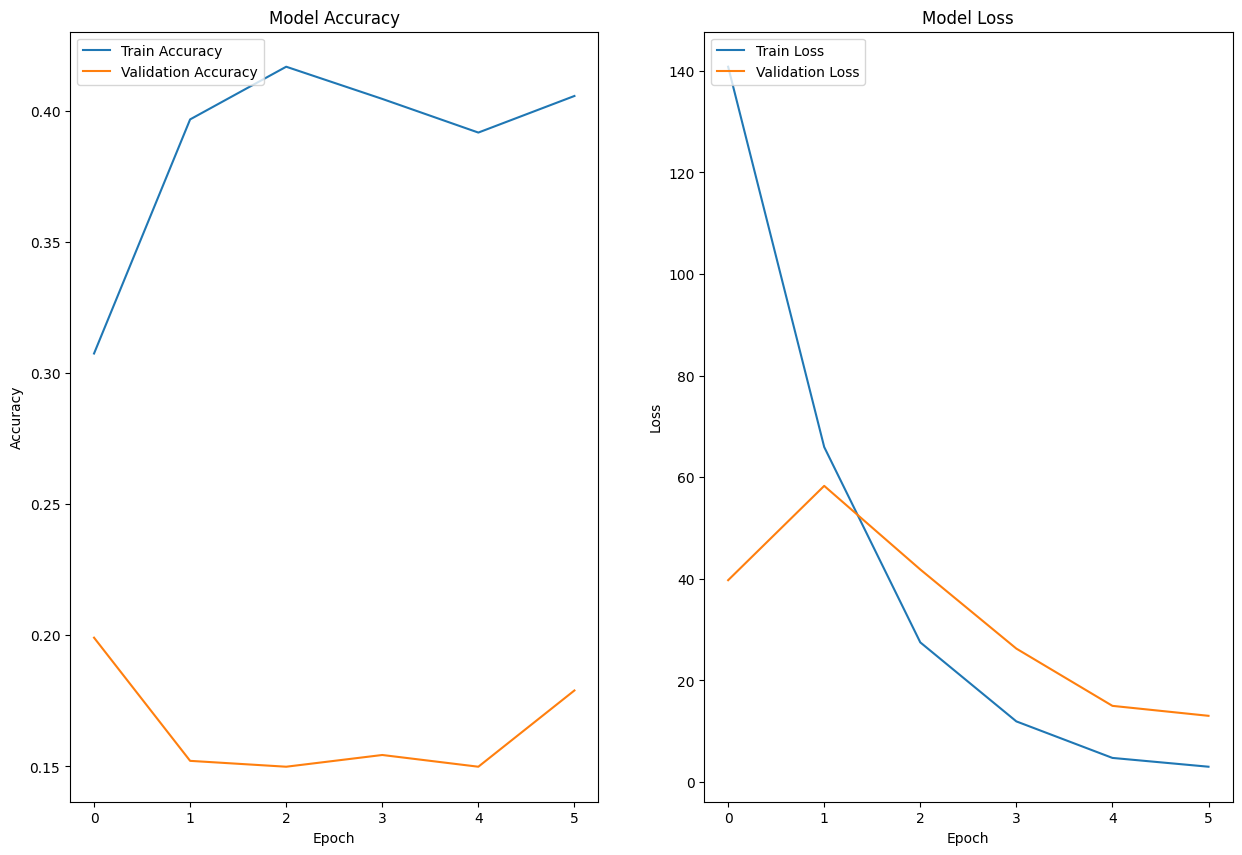

In [19]:
plot_training_curves(history, earlystop)

**Todo:** Write your findings after the model fit, see if there is an evidence of model overfit or underfit

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Model Overfit or Underfit?
            </span>   
        </font>    
</h3>

In [20]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 26s 2s/step - loss: 13.0390 - accuracy: 0.1790
Accuracy:  0.2025669664144516
Validation Accuracy:  0.17897091805934906
Loss:  12.857558250427246
Validation Loss 13.038970947265625


**Findings:** Thus we can clearly see that model Overfit and we need to chose right data augumentation strategy

In [22]:
# Data augmentation layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Visualize how augmentation strategy works for one instance of training image.
            </span>   
        </font>    
</h3>

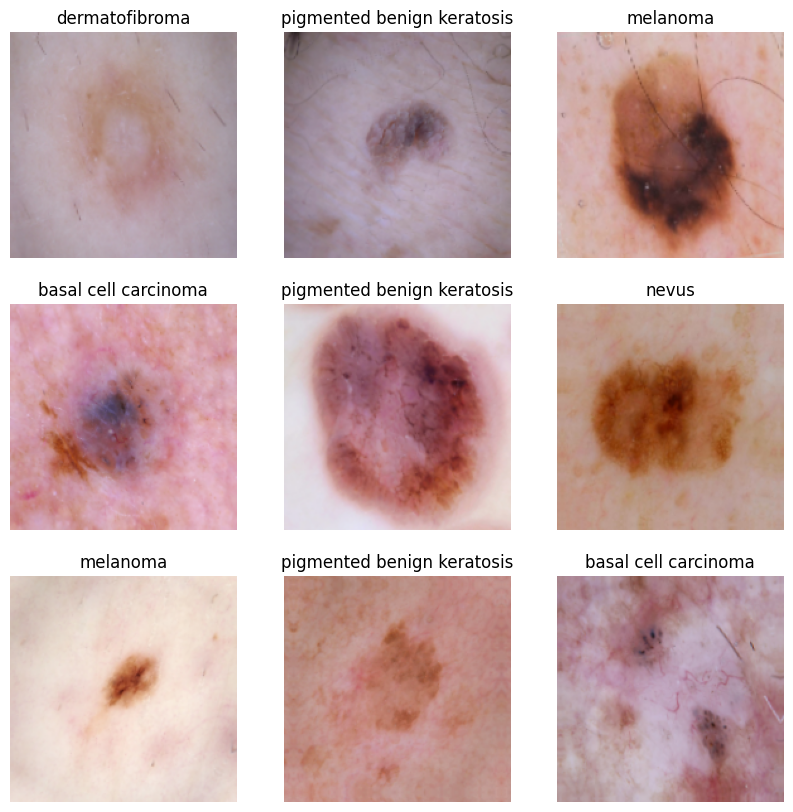

In [25]:
def visualize_data_augmentation(train_ds, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
        for i in range(9):
            # Add batch dimension to the image
            image_batch = tf.expand_dims(images[i], 0)
            # Apply data augmentation
            augmented_image = data_augmentation(image_batch)
            # Remove batch dimension
            augmented_image = tf.squeeze(augmented_image, 0)
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_image.numpy().astype("uint8"))
            plt.title(class_names[tf.argmax(labels[i])])
            plt.axis("off")
    plt.show()

visualize_data_augmentation(train_ds, class_names)

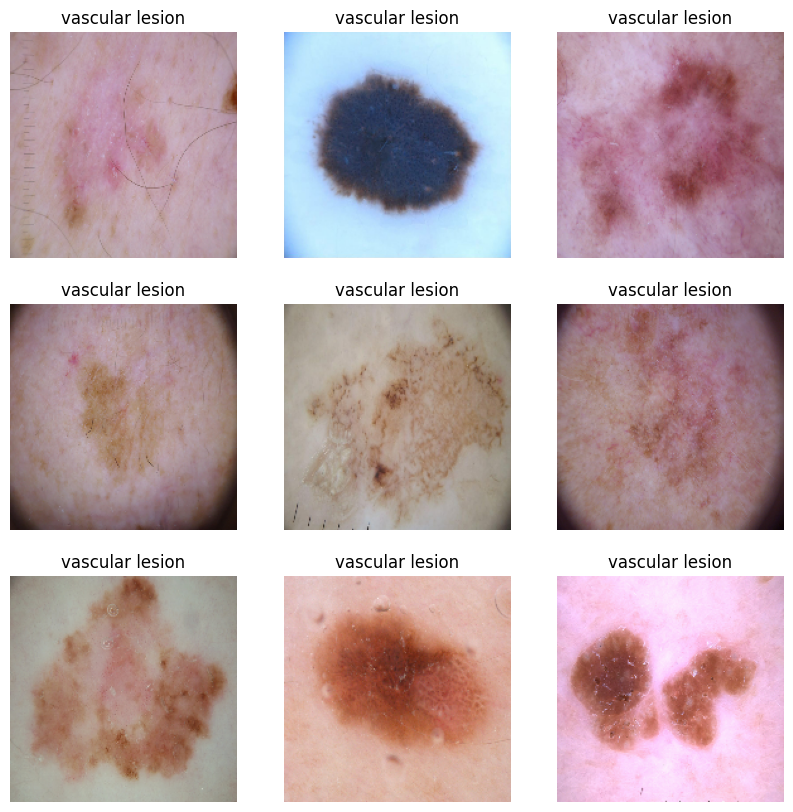

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for c in class_names:
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(c)
      plt.axis("off")

# 7. Model Building & Training on the augmented data

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Create the model
            </span>   
        </font>    
</h3>

In [26]:
input_shape = (180,180,3)

model = Sequential([data_augmentation,
                    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.4),
layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.4),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dropout(0.5),
layers.Dense(9, activation='softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 88, 128)       73856     
                                                      

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Compiling the model
            </span>   
        </font>    
</h3>

In [28]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("/content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/checkpoint/model2.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="auto",
                             verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=5,
                          mode="auto",
                          verbose=1)

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Train the model
            </span>   
        </font>    
</h3>

In [29]:
epochs = 20
history_1 = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 5.3098 - accuracy: 0.1925
Epoch 1: val_accuracy improved from -inf to 0.20582, saving model to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/checkpoint/model2.h5
56/56 [==============================] - 451s 8s/step - loss: 5.3098 - accuracy: 0.1925 - val_loss: 2.1579 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 2.1198 - accuracy: 0.2054
Epoch 2: val_accuracy did not improve from 0.20582
56/56 [==============================] - 438s 8s/step - loss: 2.1198 - accuracy: 0.2054 - val_loss: 2.0800 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - ETA: 0s - loss: 2.0484 - accuracy: 0.2109
Epoch 3: val_accuracy did not improve from 0.20582
56/56 [==============================] - 436s 8s/step - loss: 2.0484 - accuracy: 0.2109 - val_loss: 2.0299 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - ETA: 0s - loss: 1.9833 

<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Visualizing training results
            </span>   
        </font>    
</h3>

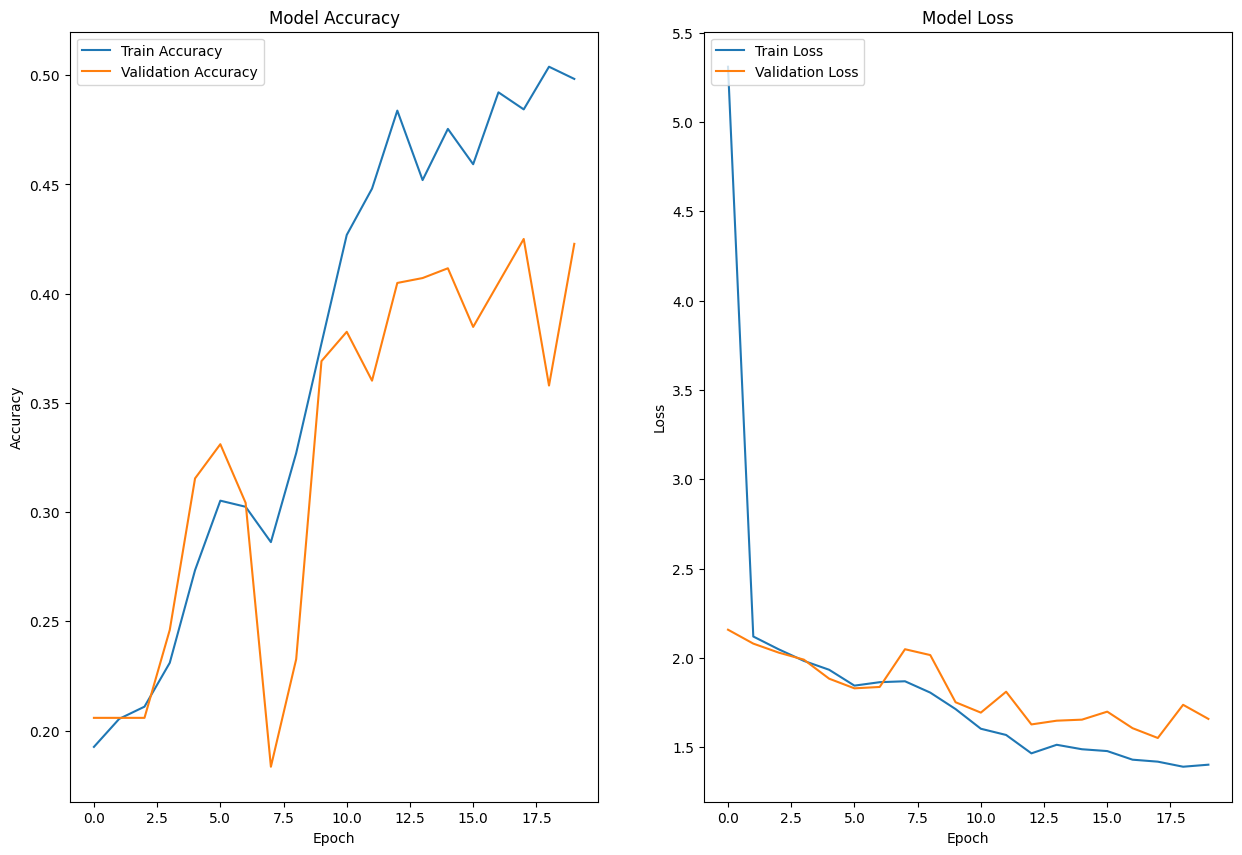

In [43]:
plot_training_curves(history_1, earlystop)

In [33]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 22s 2s/step - loss: 1.6585 - accuracy: 0.4228
Accuracy:  0.4280133843421936
Validation Accuracy:  0.42281877994537354
Loss:  1.5122058391571045
Validation Loss 1.6584975719451904


**Findings:** Model doesn't overfit but accuracy is very less, so lets try balancing the dataset.


**Todo: Find the distribution of classes in the training dataset.**

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

# 8. Examine Class Distribution

In [47]:
def class_distribution_count(directory):

    # count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    # name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    # return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Visualize the number of image in each class
            </span>   
        </font>    
</h3>

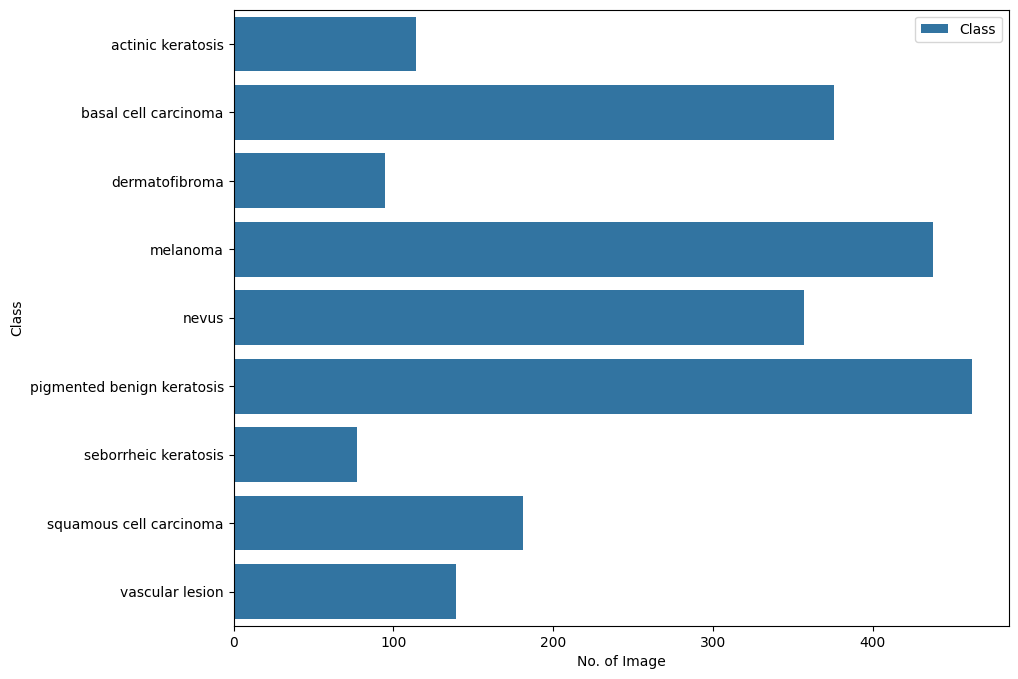

In [50]:
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image",
            y="Class",
            data=df,
            label="Class")
plt.show()

**Todo: Write your findings here:**
- Which class has the least number of samples? **seborrheic keratosis**
- Which classes dominate the data in terms proportionate number of samples? **pigmented benign keratosis**

**Todo:** Rectify the class imbalance

**Context:** You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

# 9. Handle Class Imbalances

In [51]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

* Instantiate a Pipeline object pointing to a directory containing your initial image data set.
* Define a number of operations to perform on this data set using your Pipeline object.
* Execute these operations by calling the Pipeline’s sample() method.

In [61]:
path_to_training_dataset = "/content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79AA149778B0>: 100%|██████████| 500/500 [00:24<00:00, 20.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A9FA7FBD60>: 100%|██████████| 500/500 [00:26<00:00, 19.14 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79AA4102BB50>: 100%|██████████| 500/500 [00:26<00:00, 18.92 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=962x645 at 0x79AA147F99F0>: 100%|██████████| 500/500 [01:49<00:00,  4.56 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x79A9FA7BF190>: 100%|██████████| 500/500 [01:44<00:00,  4.78 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79AA40787580>: 100%|██████████| 500/500 [00:26<00:00, 18.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x79AA14920670>: 100%|██████████| 500/500 [00:49<00:00, 10.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79AA32429540>: 100%|██████████| 500/500 [00:26<00:00, 19.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/IITB-PGPAIML/22DeepLearningAssignment/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79AA327EDC60>: 100%|██████████| 500/500 [00:24<00:00, 20.12 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [62]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


<h3 name='libraries'>   
      <font color = green >
            <span style='font-family:Georgia'>
            Lets see the distribution of augmented data after adding new images to the original training data.
            </span>   
        </font>    
</h3>

In [63]:
path_list = [x for x in data_dir_train.glob(os.path.join( '*','output', '*.jpg'))]

In [64]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for
                   y in data_dir_train.glob(os.path.join( '*','output', '*.jpg'))]

In [65]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [66]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [67]:
new_df['Label'].value_counts()

,count
Label,
actinic keratosis,500
basal cell carcinoma,500
dermatofibroma,500
melanoma,500
nevus,500
pigmented benign keratosis,500
seborrheic keratosis,500
squamous cell carcinoma,500
vascular lesion,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# 10. Retrain Model on Rectified Data

## Todo: Train the model on the data created using Augmentor

In [68]:
batch_size = 32
img_height = 180
img_width = 180

## Todo: Create a training dataset

In [69]:
train_ds_1 = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    label_mode = 'categorical',
    subset = 'training',
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


## Todo: Create a validation dataset

In [70]:
val_ds_1 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  label_mode='categorical',
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## Todo: Create your model (make sure to include normalization)

In [71]:
input_shape = (180,180,3)
model = Sequential([
                    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.4),
layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Dropout(0.4),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dropout(0.5),
layers.Dense(9, activation='softmax')])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 88, 88, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 44, 44, 128)       0         
 g2D)                                                 

## Todo: Compile your model (Choose optimizer and loss function appropriately)

In [72]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model3.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

## Todo: Train your model

In [ ]:
epochs = 30
history_2 = model.fit(train_ds_1,
                    validation_data=val_ds_1,
                    epochs=epochs,
                    callbacks=[checkpoint,earlystop])

Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 3.1888 - accuracy: 0.2580
Epoch 1: val_accuracy improved from -inf to 0.35189, saving model to model3.h5
169/169 [==============================] - 58s 334ms/step - loss: 3.1888 - accuracy: 0.2580 - val_loss: 1.9127 - val_accuracy: 0.3519
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 1.6502 - accuracy: 0.3765
Epoch 2: val_accuracy did not improve from 0.35189
169/169 [==============================] - 39s 221ms/step - loss: 1.6502 - accuracy: 0.3765 - val_loss: 1.7672 - val_accuracy: 0.3430
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 1.4881 - accuracy: 0.4329
Epoch 3: val_accuracy improved from 0.35189 to 0.43504, saving model to model3.h5
169/169 [==============================] - 45s 263ms/step - loss: 1.4881 - accuracy: 0.4329 - val_loss: 1.4930 - val_accuracy: 0.4350
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 1.3505 - accuracy: 0.4831
Ep

## Todo: Visualize the model results

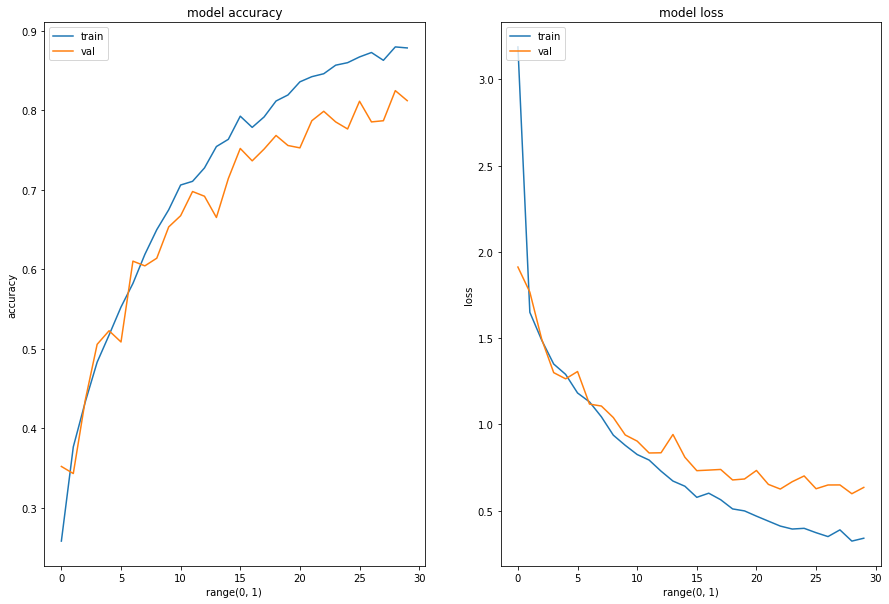

In [ ]:
plot_training_curves(history_2, earlystop)

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 52ms/step - loss: 0.3416 - accuracy: 0.8837
Accuracy:  0.8962053656578064
Validation Accuracy:  0.8836688995361328
Loss:  0.3696022927761078
Validation Loss 0.34158268570899963


**Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?**

* **Normal CNN :** 	train accuracy : 20.25%  val accuracy : 17.89%

* **Augumented CNN Model** : train accuracy: 42.80%  val accuracy: 42.28%

* **CNN Model with balanced data**: train accuracy: 89.6% val accuracy: 88.3%

As above result, we can see class balancing helped as accuracy increased and and it also didn't overfit or underfit so the balanced dataset CNN model is best model to detecting cancer.

